In [2]:
import matplotlib.pyplot as plt
import sympy as smp
import numpy as np
import scipy as sp
from scipy.misc import derivative
from sympy import *
from sympy.calculus.util import continuous_domain, function_range, maximum, minimum, stationary_points

<h1 style='text-align:center'> For a Normal Aproch </h1>

In [ ]:
# for drivatives in analtical way
x, y, z = smp.symbols('x y z')
f = smp.symbols('f', cls=smp.Function)
# function
f = 1/x * smp.sin(x)**2
# get the diravative
dydx = smp.diff(f)

<h2 style='text-align:center;'> The Function </h2>

In [ ]:
# function
f

sin(x)**2/x

<h2 style='text-align:center;'> Is Polynomial ?!</h2>

In [ ]:
# is polynomial
if f.is_polynomial():
    print('is polynomial')
else:
    print('not polynomial')

<h2 style='text-align:center;'> Domain of the Function</h2>

In [ ]:
# domain
domain = continuous_domain(f, x, S.Reals)
domain

Union(Interval.open(-oo, 0), Interval.open(0, oo))

<h2 style='text-align:center;'> Range of the Function if Applicable</h2>
<h3 style='text-align:center;'> you can by intution get it after a few cells down, if this didn't work. </p>

In [ ]:
# domain
try:
    function_range(f, x, S.Reals)
except:
    pass

<h2 style='text-align:center;'> Diravite of the Function </h2>

In [ ]:
# function diravtive
dydx

2*sin(x)*cos(x)/x - sin(x)**2/x**2

<h2 style='text-align:center;'> Diravite Simplifications if exists</h2>

In [ ]:
dydx.simplify()

(x*sin(2*x) + cos(2*x)/2 - 1/2)/x**2

<h2 style='text-align:center;'> Check the domain </h2>
<h3 style='text-align:center;'> if the domain goes from -oo and ends to oo them it is okay, but if they was any value, put them in the numpy linesspace, to avoid any errors</h3>

In [ ]:
i = input('check the domain')

In [ ]:
xaxis = np.linspace(-10, 10, 1000)
# y = f(xaxis)
vx = np.zeros(len(xaxis))
vy = np.zeros(len(xaxis))
for n in range(0, len(xaxis)):
    vx[n] = smp.N(dydx.subs(x, xaxis[n]))
    vy[n] = smp.N(f.subs(x, xaxis[n]))

<h2 style='text-align:center;'> Graphing th Function and its Driviative </h2>
<h3 style='text-align:center;'> The Function Graphing needs your knowledge of the Domain and Range concpts, to avoid being mistaken while reading the graphs </h3>

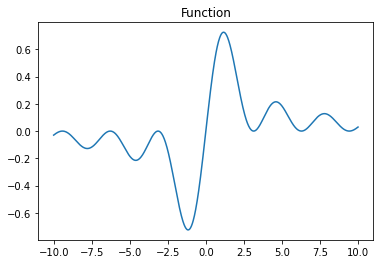

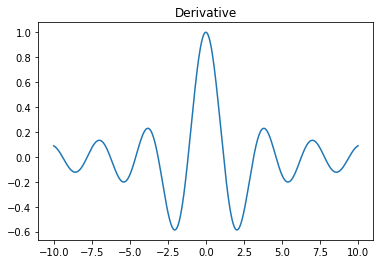

In [ ]:
plt.title('Function')
plt.plot(xaxis, vy)
plt.show()

plt.title('Derivative')
plt.plot(xaxis, vx)
plt.show()

<h2 style='text-align:center;'> Minimum and Maximum Graphings </h2>

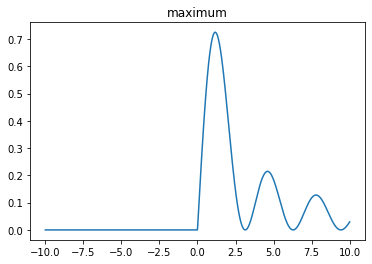

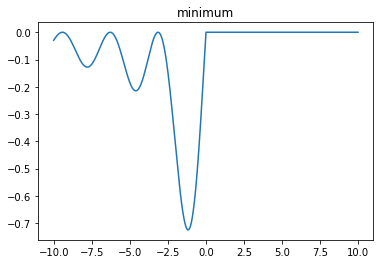

In [ ]:
plt.title('maximum')
plt.plot(xaxis, np.maximum(vy, 0))
plt.show()

plt.title('minimum')
plt.plot(xaxis, np.minimum(vy, 0))
plt.show()

<h2 style='text-align:center;'> Getting the crircal points of the Function</h2>
<h3 style='text-align:center;'> The list isn't as accurate as the Notation, the Notation gives the stationary(critical) points</h3>

In [ ]:
 criticals = xaxis[1:][vy[1:] * vy[:-1] < 0]
 print(f"f(x) is zero when x is {criticals}")
 stationary_points(f, x)

f(x) is zero when x is [0.01001001]


Union(ConditionSet(x, Eq(2*x*cos(x) - sin(x), 0), Union(Interval.open(-oo, 0), Interval.open(0, oo))), FiniteSet(0))

<h2 style='text-align:center;'> The Domain and Range </h2>
<h3 style='text-align:center;'> Showing the Range in more intuative ways if it didn't appeared above</h3>

In [ ]:
print('Domian => ', str(continuous_domain(f, x, S.Reals)))
print('Range => ', '[' ,vy.min().round(5), vy.max().round(5), ']')
try:
    print('minimum : ', minimum(f, x))
    print('maximum : ', maximum(f, x))
except:
    pass

Domian =>  Union(Interval.open(-oo, 0), Interval.open(0, oo))
Range =>  [ -0.72459 0.72459 ]


In [ ]:
i = input('Do u want the inverse')

<h2 style='text-align:center;'>Getting the inverse of the Functions</h2>
<h3 style='text-align:center;'>Not the trignometric functions, sadly :(</h3>

In [5]:
# inverse
inverse = smp.solve(smp.Equality(f, y), x)[0]
fxn = inverse.subs(y, x)
smp.Equality(y, fxn)

<h2 style='text-align:center;'> Testing if the inverse is correct </h2>

In [ ]:
# test the inverse
fxn.subs(x, f).doit().simplify()

-sqrt(x**2)

<h2 style='text-align:center;'> Graphing the Function and its inverse in the same plot </h2>
<h3 style='text-align:center;'> uncooment for usage, by pressing (Alt + /), or by removing the ( # ) </h3>

In [ ]:
# for n in range(0, len(xaxis)):
#     vx[n] = smp.N(fxn.subs(x, xaxis[n]))
# plt.title('Inverse Function')
# plt.plot(xaxis, vx)
# plt.show()

<h1 style='text-align: center;'>Limits and Continuty</h1>

<h2 style='text-align:center;'> getting of a function(s) is continus at a point or not, and getting the limits</h2>

In [ ]:
# continty check
def is_con(functions, value, around):
    l = []
    print("Be Aware of the zeros of the function")
    for function in functions:
        try:
            print(continuous_domain(function, value, S.Reals))
        except:
            pass
        if smp.limit(function, value, around, dir='-') == smp.limit(function, value, around, dir='+'):
            r = smp.limit(function, value, around, dir='-').doit().evalf()
            print(r'{}'.format(function))
            print(f'the function is continues around {around} at {r}')
            l.append(r)
        else:
            print(r'{}'.format(function))
            print(f'the function isn\'t continues around {around}')
            print('from the left : ', smp.limit(function, value, around, dir='-').doit().evalf())
            print('from the right : ', smp.limit(function, value, around, dir='+').doit().evalf())
    
    if len(functions) == len(l):
        print(functions)
        if sum(l)/len(l) == l[0]:
            print(f'the function is continues around {around}')
        else:
            print(f'the function is\'t continues around {around}')
    else:
        print(f'the function is\'t continues around {around}')

# finding the limit
def l(functions, value, around, dir):
    for function in functions:
        print(function)
        r = smp.limit(function, value, around, dir='+').doit().evalf()
        print('the limit at ', around, 'is', r)

<h2 style='text-align:center;'> Write the Function(s) as a dictionary form, to use is_con(  ) and l(  )</h2>

In [ ]:
f = [smp.sin(x) / x, 1]

<h2 style='text-align:center;'> l ( function( s ), sympol, value[ approchs to --> ], direction )</h2>

In [ ]:
l(f, x, 3, '-')

sin(x)/x
the limit at  3 is 0.0470400026866224
1
the limit at  3 is 1.00000000000000


<h2 style='text-align:center;'> is_con (  function( x ) , sympol, value[ approchs to --> ] )</h2>

In [ ]:
is_con(f, x, 3)

Be Aware of the zeros of the function
Union(Interval.open(-oo, 0), Interval.open(0, oo))
sin(x)/x
the function is continues around 3 at 0.0470400026866224
1
the function is continues around 3 at 1.00000000000000
[sin(x)/x, 1]
the function is't continues around 3


<h1 style='text-align:center'> Drivatives </h1>

In [ ]:
x, y, z = smp.symbols('x y z')
def fx(function):
    dydx = lambda value: function
    return dydx(x)

def dydx(function, degree=1):
    d = smp.diff(function)
    if degree == 1:
        d
    else:
        for n in range(1, degree):
            d = smp.diff(d)
    return d

In [ ]:
# creating the function
f = fx(smp.sin(x))
f

sin(x)

In [ ]:
# getting the dirivitve
dydx(f)

cos(x)

<h1 style='text-align:center;'>Integration</hq>

In [ ]:
# (function, (symbol, a, b))
smp.integrate(fx(x), (x))

x**2/2

<h1 style="text-align:center;">Applications of Integration</h1>
<h2 style="text-align:center;">I just took about four applications, feel free to add more</h2>

<h3 style="text-align:center;"> Area Under The Curve </h3>

$$ \int_a^b  f(x)  dx $$

In [ ]:
# Area under the curve
f = lambda x: x**2 # making the function
# a = 0
# b = 1

# (function, (sympol, a, b))
# to evaluate write a, b
# add .doit().evalf()
smp.integrate(f(x), (x))


x**3/3

In [ ]:
xaxis = np.linspace(-10, 10, 1000)
# y = f(xaxis)
vx = np.zeros(len(xaxis))
for n in range(0, len(xaxis)):
    vx[n] = smp.N(f(x).subs(x, xaxis[n]))

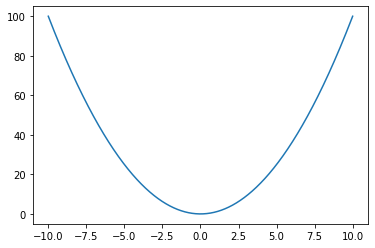

In [ ]:
plt.plot(xaxis, vx)

<h3 style="text-align:center;"> Area Between The Curves </h3>

$$ \int_a^b F(x) - G(x), d(x) $$

In [ ]:
# Area under the curve
f = lambda x: x+10 # making the function
g = lambda x: x**2 # making the function

smp.integrate(f(x) - g(x), (x))

-x**3/3 + x**2/2 + 10*x

In [ ]:
# y = f(xaxis)
vx1 = np.zeros(len(xaxis))
vx2 = np.zeros(len(xaxis))
for n in range(0, len(xaxis)):
    vx1[n] = smp.N(f(x).subs(x, xaxis[n]))
    vx2[n] = smp.N(g(x).subs(x, xaxis[n]))

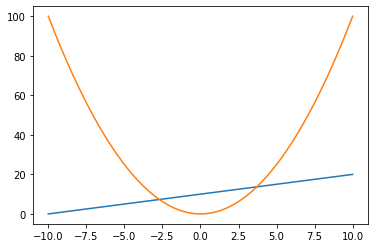

In [ ]:
plt.plot(xaxis, vx1)
plt.plot(xaxis, vx2)

<h3 style="text-align:center;"> Voluem Solid of Revolution </h3>

$$ Around \space\space the \space\space x-axis $$
$$ \int_a^b \pi(f(x))^2, dx $$
$$ Around \space\space the \space\space y-axis $$
$$ \int_a^b \pi(f(y))^2, dy $$

In [ ]:
# create the function
f = lambda x: x**2

smp.integrate(smp.pi*(f(x))**2, (x))

pi*x**5/5

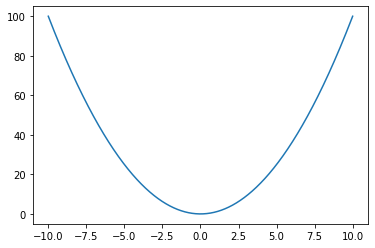

In [ ]:
vx = np.zeros(len(xaxis))
for n in range(0, len(xaxis)):
    vx[n] = smp.N(f(x).subs(x, xaxis[n]))
plt.plot(xaxis, vx)

<h3 style='text-align:center;'> Voluem of Solid of the Bounded Area Between The Curves</h3>


$$ Around \space\space the \space\space x-axis $$
$$ \int_a^b 2\pi x(F(x) - G(x)), dx $$
$$ Around \space\space the \space\space y-axis $$
$$ \int_a^b 2\pi y(F(y) - G(y)), dy $$

In [ ]:
# Functions
f = lambda x: x
g = lambda x: x**2

smp.integrate(2*smp.pi*x*(f(x) - g(x)), (x))

-pi*x**4/2 + 2*pi*x**3/3

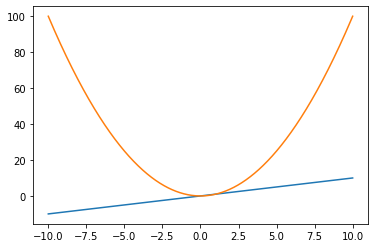

In [ ]:
vx1 = np.zeros(len(xaxis))
vx2 = np.zeros(len(xaxis))
for n in range(0, len(xaxis)):
    vx1[n] = smp.N(f(x).subs(x, xaxis[n]))
    vx2[n] = smp.N(g(x).subs(x, xaxis[n]))
plt.plot(xaxis, vx1)
plt.plot(xaxis, vx2)

<h3 style='text-align:center;'> Arc Length </h3>

$$ \int_a^b \sqrt{1+(F(x)^`)^2}, dx $$

In [ ]:
# Function
f = lambda x: (x**2)/2

smp.integrate(smp.root(1+((smp.diff(f(x))**2)), 2), (x))

x*sqrt(x**2 + 1)/2 + asinh(x)/2

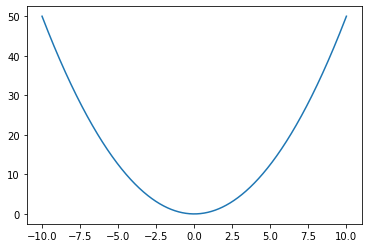

In [ ]:
vx = np.zeros(len(xaxis))
for n in range(0, len(xaxis)):
    vx[n] = smp.N(f(x).subs(x, xaxis[n]))
plt.plot(xaxis, vx)

<h3 style='text-align:center'> Linerization of a function</h3>

$$ L(x) = f(a) + f(a)^` (x - a) $$

In [ ]:
f = lambda x: smp.ln(x)
L = lambda x, a: f(a) + (smp.diff(a)*(x - a))

In [ ]:
L(1, 1.05).doit().evalf()

0.0487901641694320